<img src="logo-utn-frba.png" style="float: right;" width="200" height="40" alt="InternetCtrl">
<p style=" font-family: Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace; text-align: left;"><font color='black'>TEORÍA DE LOS CIRCUITOS II<br>Curso R4052</font></p>

<p style="border: ridge black 2px; text-align: center;font-weight: italic; font-size:25px; background-color:#FF4040">
    Trabajo Semanal N° 10
</p>

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Síntesis de funciones de excitación
</p>

<ol style="background-size: 3.2em;">
    <li style="position: relative;
               margin-bottom: 1.5em;
               padding: 1.5em;">
        <strong>Sea la función:</strong>
        <p>$$ Z(s) = \frac{(s^2+3)(s^2+1)}{s(s^2+2)} $$</p>
        <p>Se pide hallar la topología circuital y los valores de los componentes para:</p>
        <ol type="a">
              <li>Síntesis de Z(s) mediante el método de Foster en su versión  "paralelo" o "derivación".</li>
              <li>Idem a) mediante Cauer 1 y 2.</li>
        </ol>
    </li>
    <li style="position: relative;
               margin-bottom: 1.5em;
               padding: 1.5em;">
        <strong>Sea la función:</strong>
        <p> $$Y(s) = \frac{3s(s^2+7/3)} { (s^2+2) (s^2+5) } $$</p>
        <p> 
            Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.
        </p>
        <img src="CircuitoPropuesto.png" style="float: left;" width="300" height="100" alt="InternetCtrl">
    </li>
</ol>

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Resolución
</p>

<ol start="1">
    <li>        
    </li>    
</ol>

<img src="E1.jpg" style="float: left;" width="500" height="100" alt="InternetCtrl">

<ol start="2">
    <li>        
    </li>    
</ol>

<img src="E2.png" style="float: left;" width="750" alt="InternetCtrl">

<p style="border: ridge #FF4040 2px; text-align: left;font-weight: italic; font-size:15px;">
    Resolución Simbólica
</p>

<ol start="1">
    <li>        
    </li>    
</ol>

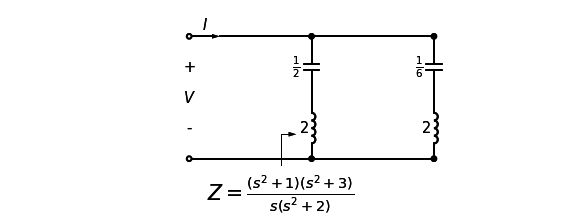

In [37]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s', complex=True)
ZZ = ((s**2+3)*(s**2+1))/(s*(s**2+2))

Y2,Yt1,L1,C1 = tc2.remover_polo_jw(1/ZZ, isImpedance = False)
Y4, Yt2, L2, C2 = tc2.remover_polo_jw(Y2, isImpedance = False )
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads
d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d,'Z', ZZ, hacia_salida = True,k_gap_width = 0.5)
d = tc2.dibujar_tanque_derivacion(d, L1, C1)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_tanque_derivacion(d, L2, C2)
display(d)

<ol start="2">
    <li>        
    </li>    
</ol>

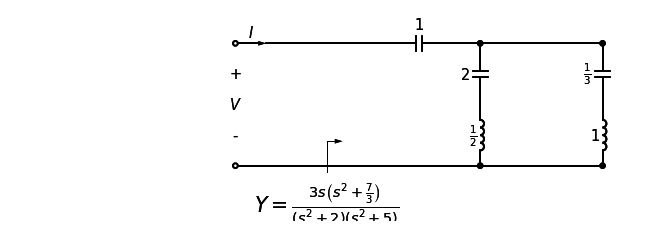

In [38]:
import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np

s = sp.symbols('s ', complex=True)
YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)
omega_L2C2 = 1
Z2, Zc1 = tc2.remover_polo_dc(1/YY, omega_zero = omega_L2C2 )
C1 = 1/(s*Zc1)
Y4, Yt2, L2, C2 = tc2.remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )
Y6, Zt3, L3, C3 = tc2.remover_polo_jw(Y4, isImpedance = False)
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads
d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')
d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d,'Y', YY, hacia_salida = True,k_gap_width = 0.5)
d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L2, C2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_tanque_derivacion(d, L3, C3)
display(d)